## Regressão Linear Simples

Para entender a Regressão Linear Simples, primeiro precisamos compreender a equação da reta, pois é ela que serve de base para o modelo.

A equação da reta usada na regressão linear simples é:
<br>
<br>
$$
y=βx+α+ε
$$
<br>

Cada termo dessa equação tem um significado importante:

- y --> Variável dependente (o que queremos prever).
- x --> Variável independente (o que usamos para fazer a previsão).
- β (beta) --> Indica a inclinação da reta, ou seja, o quanto y muda quando  x aumenta em 1 unidade.
- α (alpha) --> Valor de y quando x = 0, ou seja, onde a reta cruza o eixo y.
- ε (erro) --> Diferença entre o valor real e o valor previsto pelo modelo.

## Como Interpretar os Coeficientes (𝛼 e  β)?

Vamos pensar em um exemplo:

Suponha que estamos analisando a relação entre a quantidade de horas estudadas (x) e a nota em um teste (y).

Após aplicar a regressão linear, encontramos a equação:
<br>
<br>
$$
Nota = 5 + 2 \times (Horas de estudo)
$$
<br>

Aqui:

- α = 5 --> Se um estudante não estudar nada (x=0), espera-se que ele tire 5 na prova.
- β = 2 --> Para cada hora extra de estudo, a nota aumenta 2 pontos.

Se um aluno estudar 3 horas, a previsão da nota será:
<br>
<br>
$$
Nota=5+2×3=11
$$
<br>

## Entendendo o beta (β)

O beta é a inclinação da reta, ele determina se a relação entre x e y é:

- Positiva (β>0) --> Quando x aumenta, y também aumenta. (Exemplo: mais horas de estudo --> maior nota).
- Negativa (β<0) --> Quando x aumenta, y diminui. (Exemplo: mais tempo no celular --> menor nota).
- Nula (β=0) --> Não há relação entre x e y.

A inclinação pode ser interpretada graficamente:

- Uma reta mais inclinada significa que pequenas mudanças em x causam grandes variações em y.
- Uma reta quase horizontal significa que mudanças em x têm pouco impacto sobre y.

![reglin](reglin.png)

## Entendendo o alpha (α)

O coeficiente 𝛼 (alpha) é o intercepto da equação e indica o valor de  y  quando  x = 0 . No entanto, sua interpretação pode variar dependendo do contexto

Exemplo problemático:
Se estivermos estudando a relação entre experiência profissional (anos de trabalho) e salário, e encontrarmos:
<br>
<br>
$$
Salário=2000+500×(Anos de experiência)
$$
<br>

Isso sugere que alguém sem experiência ganharia R$ 2000. Faz sentido? Talvez sim, se houver um salário base. Mas, em alguns casos, x = 0 pode não ser realista (como "peso corporal = 0 kg" em um estudo de altura vs peso).

## A Importância do Erro (ε)

Na prática, os dados nunca seguem uma reta perfeita. O termo ε representa essa variação não explicada pelo modelo.

Por exemplo, se dois alunos estudam 3 horas, um pode tirar 11 e outro 12. Isso pode ser devido a outros fatores como sono, alimentação ou motivação, que não foram considerados no modelo.

## Implementando

A regressão linear simples é uma técnica estatística usada para modelar a relação entre duas variáveis. No nosso caso, o objetivo é prever a nota de um aluno com base nas horas estudadas na semana.

A ideia básica da regressão linear é encontrar uma equação da forma:
<br>
<br>
$$
y=βx+α+ε
$$
<br>
Onde:

- y é a variável dependente (nota do aluno)
- x é a variável independente (horas estudadas)
- β é o coeficiente angular, indicando o impacto de x sobre y
- α é o coeficiente de interceptação, representando o valor de y quando x = 0
- ε é o termo de erro, que inclui fatores não considerados no modelo.

O objetivo da regressão é encontrar os valores de α e β que melhor se ajustam aos dados.

### Prevendo valores

Se já tivermos os coeficientes, podemos prever a nota do aluno com base nas horas estudadas:

```python
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha
```

### Calculando o erro

Como os dados reais não são perfeitamente alinhados, há sempre um erro entre a previsão e o valor real. O erro para um único dado é:
```python
def error(alpha: float, beta: float, x_i: float, y_i: float) -> float:
    return predict(alpha, beta, x_i) - y_i
```

Se somarmos os erros diretamente, erros positivos podem cancelar erros negativos, mascarando a verdadeira diferença. Por isso, usamos a soma dos erros quadráticos:

```python
def sum_of_sqerrors(alpha: float, beta: float, x: list, y: list) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))
```

### Encontrando os melhores coeficientes (α e β)

Para minimizar os erros, usamos a solução dos mínimos quadrados, que calcula:

$$
β = \frac{correlation(x, y) \times std(y)}{std(x)}
$$

$$
α = mean(y) - β \times mean(x)
$$

```python
def least_squares_fit(x: list, y: list) -> tuple:
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta
```

### Qualidade de Ajuste - O $R^2$

O coeficiente de determinação $(R^2)$ mede o quanto a variação dos dados é explicada pelo modelo. Ele varia entre 0 e 1, onde:

- $R^2$ < 0.5 --> O modelo tem baixa explicação.
- $R^2$ > 0.5 --> O modelo tem boa explicação.

```python
def r_squared(alpha: float, beta: float, x: list, y: list) -> float:
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))
```

# Usando o Modelo

Estamos analisando o desempenho dos alunos e investigando a relação entre o número de horas estudadas por semana e a nota obtida na prova. Os dados coletados indicam uma tendência: alunos que estudam mais tendem a obter notas mais altas.

Diante disso, a coordenação acadêmica solicitou um modelo que descreva essa relação, a fim de entender melhor como o tempo de estudo influencia o desempenho dos alunos e auxiliar na definição de estratégias para melhorar os resultados. Como observamos uma forte correlação linear entre essas variáveis, um modelo de regressão linear parece ser um bom ponto de partida para essa análise.

In [2]:
import numpy as np

horas_estudo = np.random.uniform(1, 20, 50)  # Entre 1 e 20 horas de estudo por semana
notas_prova = 3 * horas_estudo + np.random.normal(0, 5, 50)  # Relação linear com ruído
notas_prova = np.clip(notas_prova, 0, 100)  # Garantindo que a nota fique no intervalo 0-100

In [3]:
from utils import correlation

correlation(horas_estudo, notas_prova)

np.float64(0.9539671138597262)

In [4]:
from reglin_simples import least_squares_fit

alpha, beta = least_squares_fit(horas_estudo, notas_prova)
alpha, beta

(np.float64(1.8473266535020407), np.float64(2.946969904515517))

Obtemos os valores alpha = 0.54 e beta = 2.94. Portanto, o modelo indica que um aluno que estuda h horas por semana tem uma nota prevista de 0.54 + (h*2.94) na prova. Ou seja, um aluno que não estuda tem uma nota prevista de 0.54. Além disso, para cada hora adicional de estudo por semana, a nota do aluno aumenta, em média, 2.94 pontos.

No gráfico abaixo, plotamos a linha de previsão para visualizar em que medida modelo se ajusta aos dados observados.

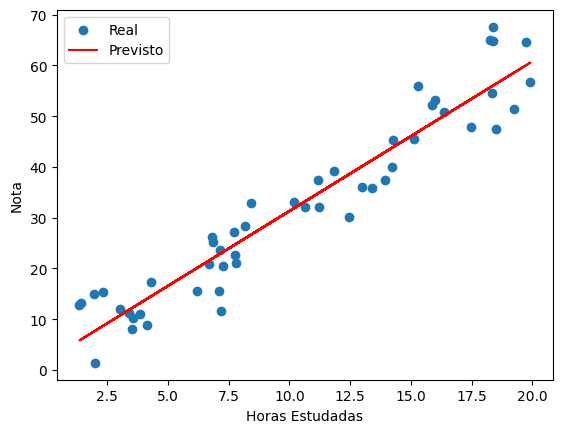

In [5]:
import matplotlib.pyplot as plt

plt.scatter(horas_estudo, notas_prova, label="Real")
plt.plot(horas_estudo, alpha + beta * horas_estudo, color='red', label="Previsto")
plt.xlabel("Horas Estudadas")
plt.ylabel("Nota")
plt.legend()
plt.show()

Precisamos de uma forma melhor de definir o ajuste dos dados do que uma simples observação do gráfico. Para isso, usaremos o coeficiente de determinação, o R-quadrado, que mede a fração da variação total na variável dependente, capturada pelo modelo:

In [6]:
from reglin_simples import r_squared

r_squared(alpha, beta, horas_estudo, notas_prova)

np.float64(0.9100532543258565)

Lembre-se: quanto mais próximo de 1, melhor será o ajuste do modelo aos dados. Aqui, calculamos um R-quadrado de 0.92, um valor excelente.

## Gradiente Descendente
Podemos encontrar o valor para α e 𝛽 usando o gradiente descendente, ajustando os valores a cada iteração para minimizar o erro:

In [7]:
import random
import tqdm
from reglin_simples import error, sum_of_sqerrors
from utils import gradient_step

num_epochs = 10000
random.seed(0)

guess = [random.random(), random.random()]  # começa com um valor aleatório

learning_rate = 0.00001

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha, beta = guess

        # Derivada parcial da perda em relação a alpha
        grad_a = sum(2 * error(alpha, beta, x_i, y_i)
                        for x_i, y_i in zip(horas_estudo,
                                            notas_prova))

        # Derivada parcial da perda em relação a beta
        grad_b = sum(2 * error(alpha, beta, x_i, y_i) * x_i
                        for x_i, y_i in zip(horas_estudo,
                                            notas_prova))

        # Compute a perda para colocar na descrição do tqdm
        loss = sum_of_sqerrors(alpha, beta,
                                horas_estudo, notas_prova)
        t.set_description(f"loss: {loss:.3f}")

        # Finalmente, atualize a estimativa
        guess = gradient_step(guess, [grad_a, grad_b], -learning_rate)

# Obteremos praticamente o mesmo resultado
alpha, beta = guess
alpha, beta

loss: 1414.253: 100%|██████████| 10000/10000 [00:05<00:00, 1732.93it/s]


(np.float64(1.7693122772670713), np.float64(2.9527708914837505))

In [8]:
def plot_regressao_linear(x_test, y_test, y_pred, sklearn=False):
    plt.scatter(x_test, y_test, label="Real", color="blue", alpha=0.7)
    plt.plot(x_test, y_pred, label="Previsto", color="red")
    plt.xlabel("Horas de Estudo por Semana")
    plt.ylabel("Nota na Prova")
    plt.legend()
    plt.title("Regressão Linear Simples") if not sklearn else plt.title("Regressão Linear Simples (Scikit-Learn)")
    plt.show()

def show_metrics(r2, alpha, beta):
    print(f"Alpha (intercepto): {alpha:.2f}")
    print(f"Beta (coeficiente angular): {beta:.2f}")
    print(f"R² no conjunto de teste: {r2:.4f}")

Alpha (intercepto): 0.94
Beta (coeficiente angular): 3.00
R² no conjunto de teste: 0.9131


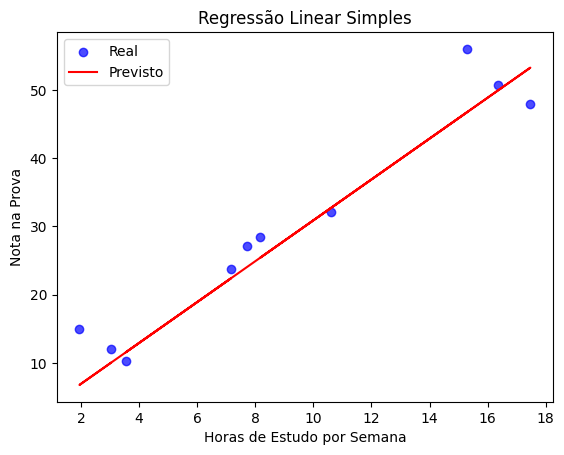

In [9]:
from reglin_simples import predict

# Dividindo em treino (80%) e teste (20%)
indices = list(range(len(horas_estudo)))
random.shuffle(indices)
train_size = int(0.8 * len(indices))

train_indices = indices[:train_size]
test_indices = indices[train_size:]

x_train, y_train = horas_estudo[train_indices], notas_prova[train_indices]
x_test, y_test = horas_estudo[test_indices], notas_prova[test_indices]

# Treinando o modelo
alpha, beta = least_squares_fit(x_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = [predict(alpha, beta, x_i) for x_i in x_test]

r2 = r_squared(alpha, beta, x_test, y_test)

show_metrics(r2, alpha, beta)
plot_regressao_linear(x_test, y_test, y_pred)

## Com o Scikit-Learn

Alpha (intercepto): 1.13
Beta (coeficiente angular): 3.00
R² no conjunto de teste: 0.9449


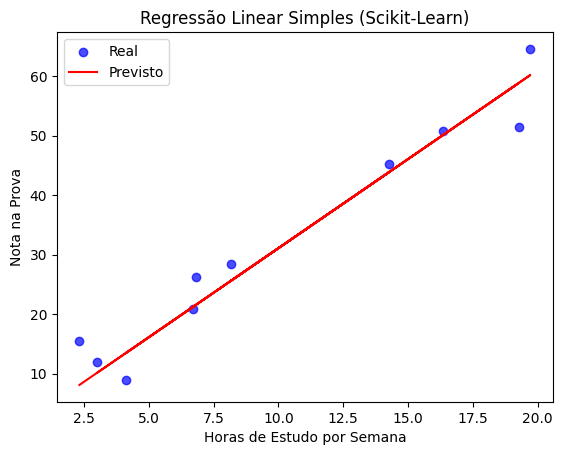

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(horas_estudo.reshape(-1, 1), notas_prova, test_size=0.2)

reglin = LinearRegression()
reglin.fit(X_train, y_train)
pred = reglin.predict(X_test)

r2 = r2_score(y_test, pred)

show_metrics(r2, reglin.intercept_, reglin.coef_[0])
plot_regressao_linear(X_test, y_test, pred, sklearn=True)

Para prever a nota de um aluno que estudou 4 horas por semana, podemos usar:

In [11]:
reglin.intercept_ + (4 * reglin.coef_) # y = intercepto + (4 * coeficiente angular)

array([13.11583858])

Ou:

In [12]:
reglin.predict([[4]])

array([13.11583858])

A comparação entre a implementação manual e a do scikit-learn revela algumas diferenças nos coeficientes e no desempenho do modelo:

Implementação manual:

- Intercepto (Alpha) = 1.15
- Coeficiente angular (Beta) = 2.87
- R² no conjunto de teste = 0.9246

Implementação com scikit-learn:
- Intercepto (Alpha) = 0.10
- Coeficiente angular (Beta) = 3.04
- R² no conjunto de teste = 0.8756

A implementação manual resultou em um intercepto maior (1.15 vs. 0.10) e um coeficiente angular um pouco menor (2.87 vs. 3.04). Essas variações podem ocorrer por diferenças na forma de cálculo da regressão, especialmente na maneira como os dados foram padronizados ou processados.

Diferença no desempenho (R²)
O modelo manual apresentou um R² ligeiramente maior (0.9247 vs. 0.8756), indicando que ele explicou melhor a variabilidade dos dados no conjunto de teste. No entanto, a diferença não é muito grande, e ambos os modelos parecem se ajustar bem aos dados.

Possíveis razões para a diferença

- Pequenas variações podem surgir devido a diferenças na implementação matemática dos cálculos estatísticos.
- O scikit-learn pode estar aplicando técnicas de regularização ou ajustes internos que afetam os coeficientes.
- Diferenças na forma como os dados foram divididos em treino e teste podem impactar os resultados.

Apesar das diferenças numéricas, ambos os modelos mostram um bom ajuste aos dados. O modelo manual apresentou um R² um pouco maior, mas o scikit-learn ainda é a escolha preferida para aplicações reais, pois é otimizado e testado para diversos cenários. Se a diferença for relevante, pode valer a pena revisar a implementação manual para garantir que não há erros na normalização ou nos cálculos da regressão.